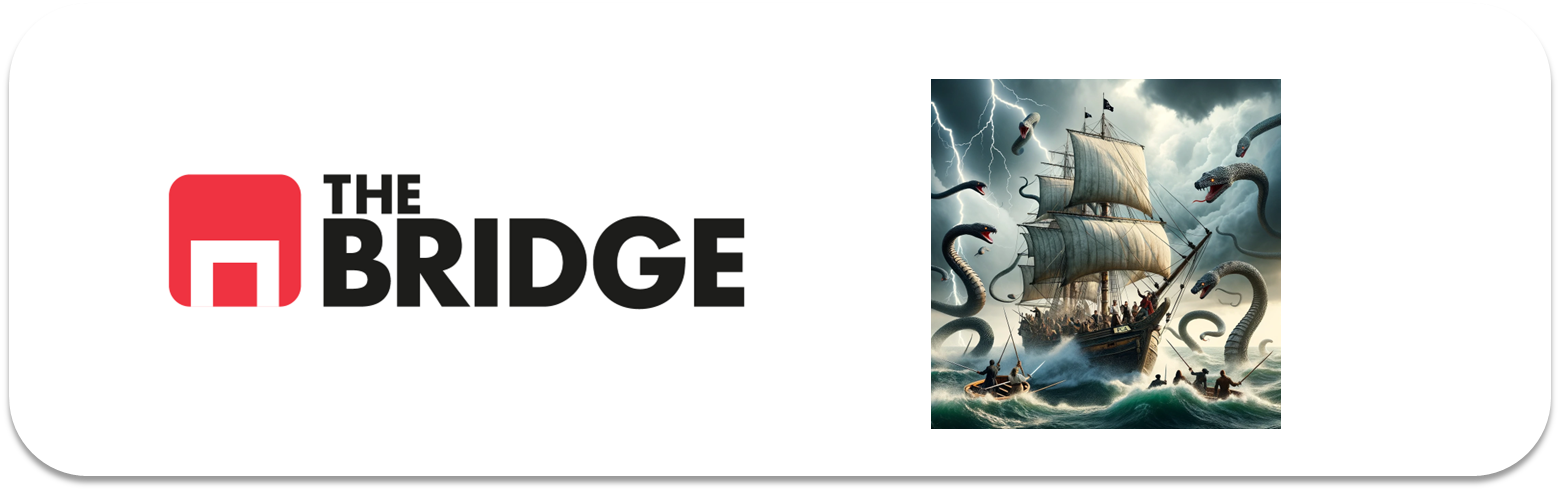

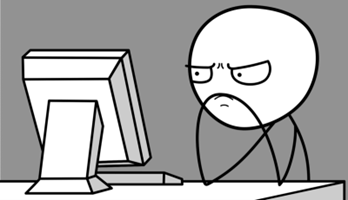

Para ejercitarte y afianzar lo aprendido sobre **PCA**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)

La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

# Principal Components Analysis: Nutrition
En esta colección de ejercicios no vas a montar ningún modelo de Machine Learning supervisado, sino que vas a practicar con PCA: pretratar el dato antes de calcular sus PCs, interpretarlas, pintar y escoger número de componentes según varianza.


### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


### Ejercicio 1: Importa los datos
1. Importa los datos: *nutrition.csv*
2. Observa las columnas que hay, así como su tipo.

In [6]:
# Importar el dataset
data = pd.read_csv('./data/nutrition.csv')

# Mostrar las primeras filas y tipos de columnas
data.head()




,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


In [8]:
data.describe()

,ID,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
count,8618.000000,8618.000000,8618.00000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,...,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000
mean,15467.757368,226.438617,11.52391,10.647024,21.819062,6.560253,2.023242,93.968786,0.264369,1.225260,...,0.125765,0.213222,0.182499,0.174881,0.061176,0.000191,0.077965,0.222838,0.229363,0.179111
std,9221.428766,169.388910,10.55059,15.866353,27.239000,13.602098,4.313670,779.362205,0.478614,4.319183,...,0.466402,0.302161,0.346062,0.431974,0.167803,0.000615,0.133496,0.290133,0.514406,0.305292
min,1001.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8695.250000,93.000000,2.47000,0.992500,0.040000,0.000000,0.000000,0.000000,0.034250,0.000000,...,0.000000,0.023875,0.035385,0.025000,0.007500,0.000033,0.023810,0.052857,0.001818,0.020909
50%,14273.000000,191.000000,8.28500,5.235000,8.945000,0.370000,0.300000,1.500000,0.120000,0.080000,...,0.017500,0.131250,0.115385,0.064583,0.015833,0.000088,0.047619,0.190000,0.070909,0.076818
75%,20050.750000,336.000000,19.97750,13.900000,32.900000,5.300000,2.400000,21.000000,0.355000,1.297500,...,0.062500,0.314328,0.200000,0.185833,0.051667,0.000161,0.069048,0.308571,0.387273,0.245455
max,93600.000000,902.000000,88.32000,100.000000,100.000000,99.800000,79.000000,30000.000000,12.000000,98.890000,...,14.702500,7.968750,13.461538,19.479167,6.136667,0.016722,1.859524,14.168571,34.854545,8.268182


### Ejercicio 2


Analiza la correlación entre las variables numéricas. 

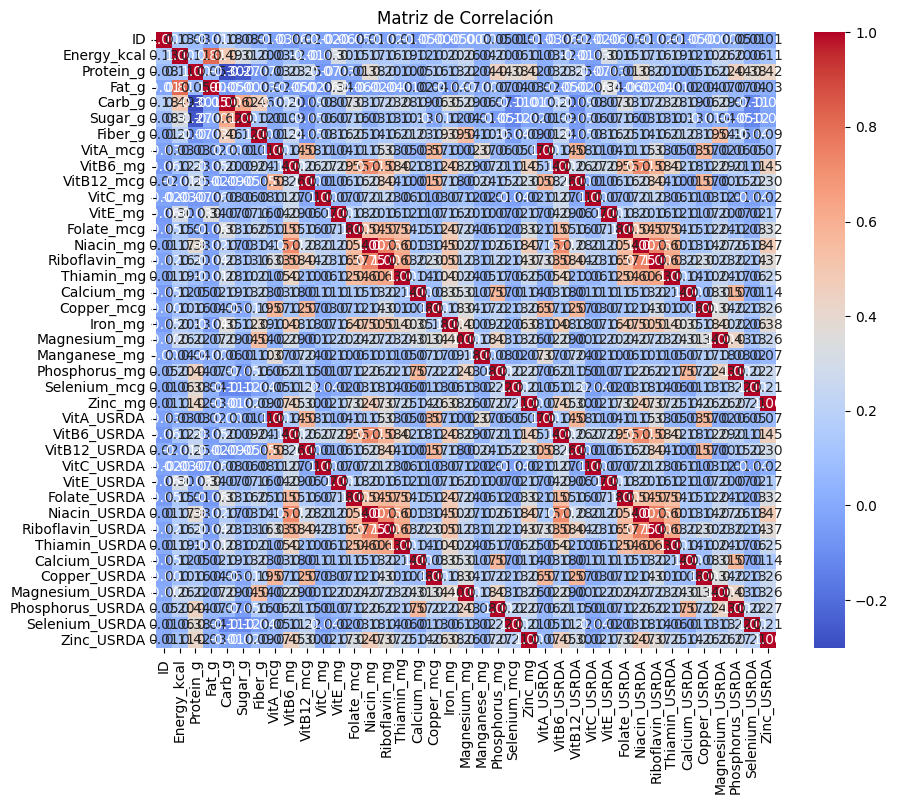

In [9]:
numerical_data = data.select_dtypes(include=['number'])

# Paso 2: Calcular la matriz de correlación
correlation_matrix = numerical_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


### Ejercicio 3

¿Qué pasa con las columnas USRDA? ¿Hay que tomar alguna decisión?

In [11]:
# Eliminar columnas que contienen 'USRDA'
data = data.loc[:, ~data.columns.str.contains('USRDA')]


### Ejercicio 4: Variables Categóricas

Podríamos analizar las variables no numéricas del dataset e intentar obtener más información, pero por simplicidad en este caso procedemos a eliminarlas. Elimina las variables de texto del dataset.

In [12]:
# Eliminar columnas no numéricas
data = data.select_dtypes(include=[np.number])


### Ejercicio 5: Distribuciones

Analiza la distribución de las variables/columnas/features restantes. Recuerda que PCA es altamente sensible a las escala, así que transforma aquellas variables que creas necesario antes de proceder a escalarlas.


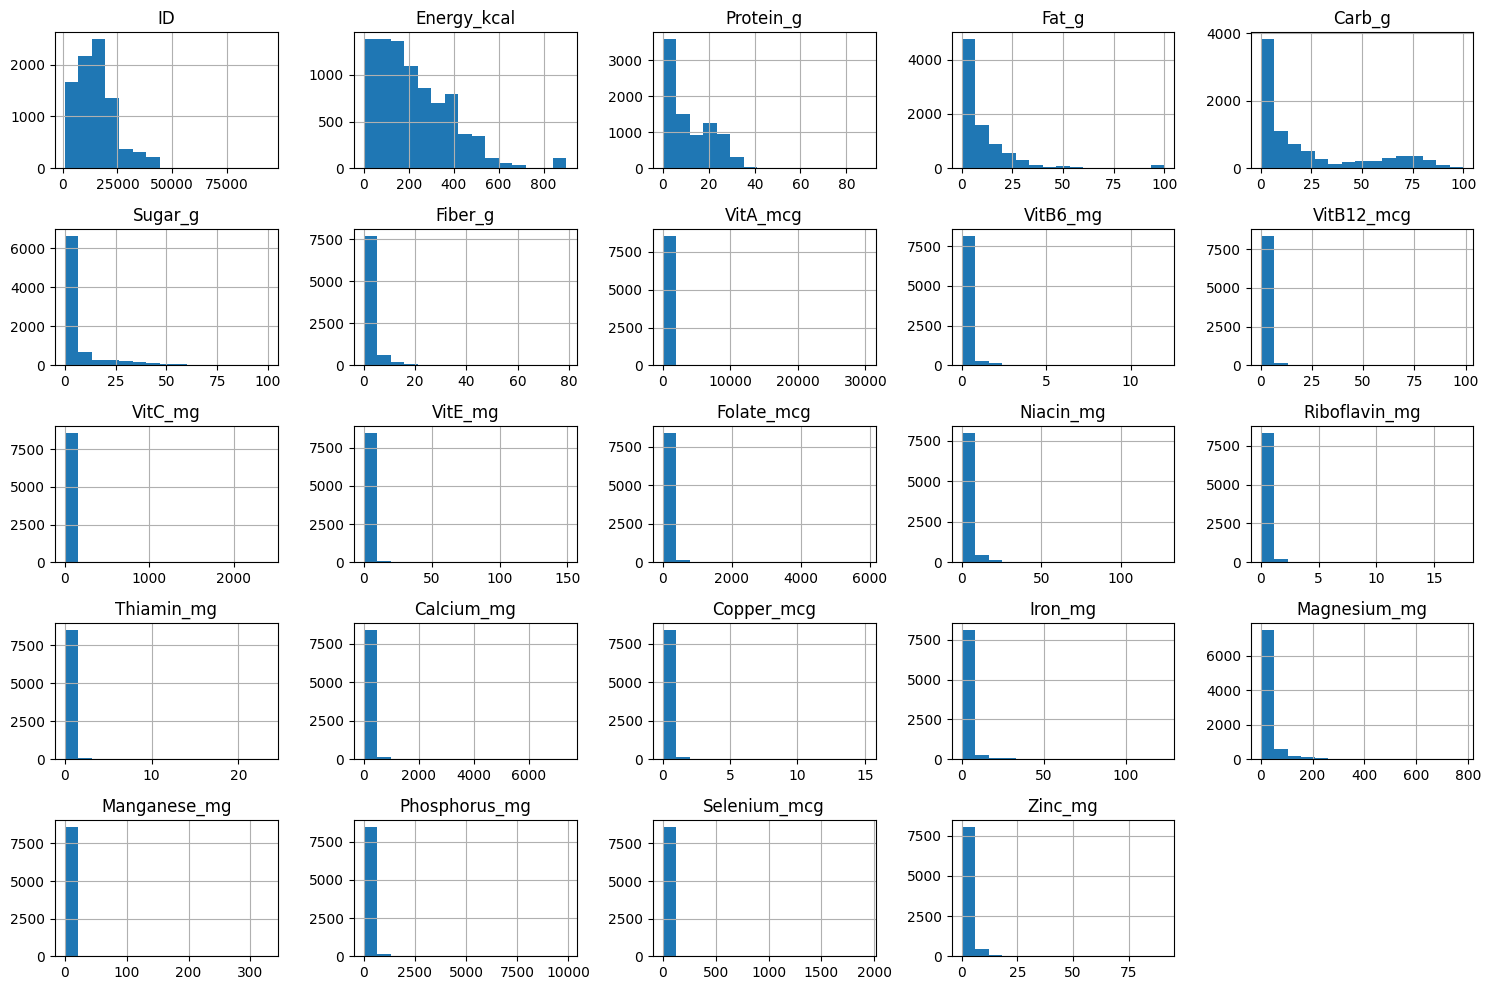

In [13]:
# Visualizar distribuciones
data.hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()
#Si alguna variable está muy sesgada, puedes aplicar transformaciones como logaritmos o raíces cuadradas.



### Ejercicio 6: Estandarizado
Estandariza cada variable. (No es necesario que dividas en train y test por simplificar).

In [14]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


### Ejercicio 7: Implementación del PCA
Prueba a montar un PCA con todos los componentes. Para ello utiliza los datos previamente transformados y escalados.

In [15]:
pca = PCA()
pca.fit(data_scaled)


PCA()

### Ejercicio 8

Muestra en un dataframe la relación de cada componente con cada feature. En general, este paso no lo haremos salvo que sea necesario a posteriori explicar la influencia de alguna componente en función de las features originales, pero ahora, muéstralas.

In [16]:
components_df = pd.DataFrame(pca.components_, columns=data.columns)
components_df.index = [f'PC{i+1}' for i in range(len(components_df))]
print(components_df)


            ID  Energy_kcal  Protein_g     Fat_g    Carb_g   Sugar_g  \
PC1   0.002174     0.157886   0.140647  0.033014  0.169777  0.076375   
PC2   0.058412     0.278724  -0.338474  0.113776  0.446728  0.360362   
PC3   0.081574     0.461542   0.220812  0.526783 -0.044836 -0.051974   
PC4   0.020525     0.047780  -0.310607  0.019192  0.176098  0.218782   
PC5   0.002800     0.293480  -0.012799  0.393881 -0.082355  0.048683   
PC6   0.591842     0.101870   0.193286 -0.166159  0.276906  0.284648   
PC7   0.088486     0.044903   0.001436  0.051676 -0.013319  0.234323   
PC8   0.476647    -0.022028   0.106295 -0.049559  0.010955 -0.140724   
PC9   0.271384    -0.042240   0.037861 -0.023387 -0.066413 -0.112530   
PC10 -0.215296    -0.083626   0.016245 -0.200468  0.119359  0.455861   
PC11 -0.343152     0.118838   0.025633  0.071504  0.083789 -0.031156   
PC12  0.306680    -0.176517  -0.282348 -0.097635 -0.036493 -0.154885   
PC13  0.164120     0.097199  -0.142106  0.168637 -0.011332 -0.29

### Ejercicio 9: Aportación de cada PCA
Visualiza en un diagrama de líneas la suma acumulada de la varianza explicativa del PCA.

Si tuviéses que quedarte con 70-75 % de la varianza original, ¿con cuántos Principal Components te quedarías?

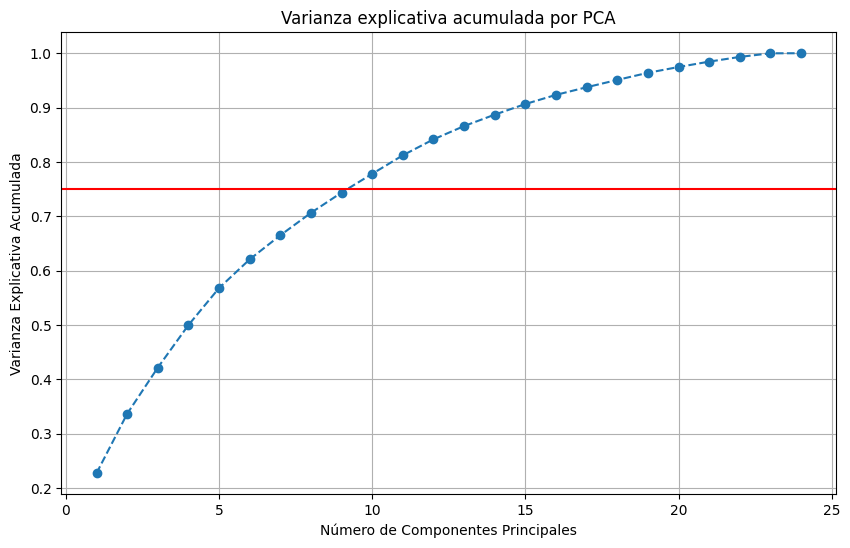

In [17]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Varianza explicativa acumulada por PCA')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicativa Acumulada')
plt.grid()
plt.axhline(y=0.75, color='r', linestyle='-')
plt.show()


### Ejercicio 10: Reducción de features

Crea un nuevo PCA con X Principal Components, siendo X la cantidad de PC escogidos en el apartado anterior.

Obtén el nuevo dataset con el mismo número de registros que el original, pero en este caso con X features, que representan los PC elegidos.

In [20]:
# Supongamos que decidimos quedarnos con 5 componentes
n_components = 9
pca_reduced = PCA(n_components=n_components)
data_reduced = pca_reduced.fit_transform(data_scaled)

# Convertir a DataFrame
reduced_df = pd.DataFrame(data_reduced, columns=[f'PC{i + 1}' for i in range(n_components)])
reduced_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-1.125071,1.107756,3.490540,0.998103,3.075699,-2.096073,0.238945,-1.152697,-0.394858
1,-1.117982,1.109631,3.490872,1.007875,3.068960,-2.098096,0.230866,-1.154354,-0.403860
2,-0.998147,1.505880,4.517329,1.221430,3.903331,-2.273010,0.287096,-1.172542,-0.454036
3,0.232486,-0.646836,1.761219,-0.888398,-0.443694,-1.159527,1.446967,-1.938931,0.049680
4,0.297375,-0.615893,2.160134,-0.962541,-0.881322,-1.178677,1.854473,-2.274319,0.165405
...,...,...,...,...,...,...,...,...,...
8613,0.574453,-1.529278,2.287489,0.063639,0.608001,4.557503,0.824916,3.598869,1.415259
8614,-0.744474,-0.839443,0.939181,-0.625457,-0.867598,5.096723,0.935801,3.809946,2.372276
8615,-0.749539,3.750968,-0.298857,2.117832,0.197259,6.756951,1.681197,2.961082,1.585517
8616,0.373479,-0.203338,1.646354,-0.513878,-1.793395,3.918743,-0.334512,4.985031,1.906754


In [ ]:
Has realizado un PCA siguiendo estos pasos:

Importaste los datos y exploraste su estructura.
Analizaste la correlación entre las variables numéricas.
Decidiste eliminar las columnas no relevantes.
Comprobaste la distribución de las variables y las transformaste si era necesario.
Estandarizaste los datos.
Implementaste el PCA.
Mostraste la relación entre los componentes y las características originales.
Visualizaste la varianza explicativa acumulada y decidiste el número de componentes a retener.
Creaste un nuevo conjunto de datos con las características reducidas.
Esto te permite hacer un análisis más eficiente y obtener patrones en los datos sin la complejidad de las características originales.